### 🆕 3 Cycle (언더 샘플링) 

In [1]:
import pandas as pd

h_df = pd.read_csv('./datasets/heart_disease.csv')
h_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [2]:
pre_h_df = h_df.drop(labels=['education'], axis=1)

In [3]:
pre_h_df = pre_h_df.dropna(subset=['glucose', 'cigsPerDay', 'totChol', 'BMI', 'BPMeds', 'heartRate'])
pre_h_df = pre_h_df.reset_index(drop=True)

In [4]:
pre_h_df['targets'] = pre_h_df['diabetes']
pre_h_df = pre_h_df.drop(labels=['diabetes'], axis=1)
pre_h_df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,targets
0,1,39,0,0.0,0.0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0
1,0,46,0,0.0,0.0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0
2,1,48,1,20.0,0.0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,0
3,0,61,1,30.0,0.0,0,1,225.0,150.0,95.0,28.58,65.0,103.0,1,0
4,0,46,1,23.0,0.0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3744,1,58,0,0.0,0.0,0,1,187.0,141.0,81.0,24.96,80.0,81.0,0,0
3745,1,68,0,0.0,0.0,0,1,176.0,168.0,97.0,23.14,60.0,79.0,1,0
3746,1,50,1,1.0,0.0,0,1,313.0,179.0,92.0,25.97,66.0,86.0,1,0
3747,1,51,1,43.0,0.0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0,0


In [5]:
pre_h_df['targets'].value_counts()

targets
0    3647
1     102
Name: count, dtype: int64

In [6]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline

# 언더 샘플링
under_h_dfs = []

for i in range(2):
    h_samples = pre_h_df[pre_h_df['targets'] == i].sample(102, random_state=124)
    under_h_dfs.append(h_samples)

under_h_df = pd.concat(under_h_dfs).reset_index(drop=True)

In [7]:
under_h_df['targets'].value_counts()

targets
0    102
1    102
Name: count, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

features, targets = under_h_df.iloc[:, :-1], under_h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# lda에서의 n_components = 분류-1
# 분류란? 타겟 데이터의 value_counts() 수 
for i in range(1):
    lda = LinearDiscriminantAnalysis(n_components=(i + 1))
    
    lda_train = lda.fit_transform(X_train, y_train)
    # 보존율 확인
    print(lda.explained_variance_ratio_.sum())

1.0


In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# 1차원으로 훈련 진행
lda = LinearDiscriminantAnalysis(n_components=1)

lda_train = lda.fit_transform(X_train, y_train)

lda_columns = [f'lda{i + 1}' for i in range(lda_train.shape[1])]
lda_train_df = pd.DataFrame(lda_train, columns=lda_columns)
lda_train_df.loc[:, 'target'] = y_train

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

# 파이프라인 구축
pipe = Pipeline([('std', StandardScaler()),
                 ('lda', LinearDiscriminantAnalysis(n_components=1)),
                 ('log_reg', LogisticRegression())])

# LogisticRegression의 매개변수 설정
parameters = {'log_reg__C': [0.001, 0.01, 0.1, 1, 10, 100]}

# 그리드서치를 사용하여 최적의 매개변수 탐색
g_log_reg = GridSearchCV(pipe, param_grid=parameters, cv=5, scoring='accuracy')

# 훈련
g_log_reg.fit(X_train, y_train)
prediction = g_log_reg.predict(X_test)

In [12]:
result_df = pd.DataFrame(g_log_reg.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,{'log_reg__C': 0.001},0.730114,6
1,{'log_reg__C': 0.01},0.772538,1
2,{'log_reg__C': 0.1},0.754167,5
3,{'log_reg__C': 1},0.754356,2
4,{'log_reg__C': 10},0.754356,2
5,{'log_reg__C': 100},0.754356,2


In [13]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[17  4]
 [ 5 15]]
정확도: 0.7805, 정밀도: 0.7895, 재현율: 0.7500, F1:0.7692, AUC:0.7798
###########################################################################


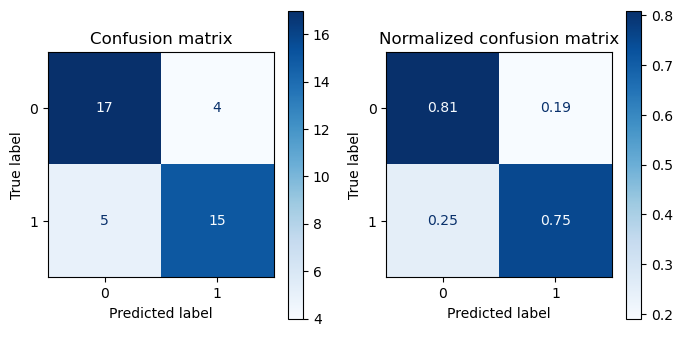

In [14]:
get_evaluation(y_test, prediction, g_log_reg, X_test)

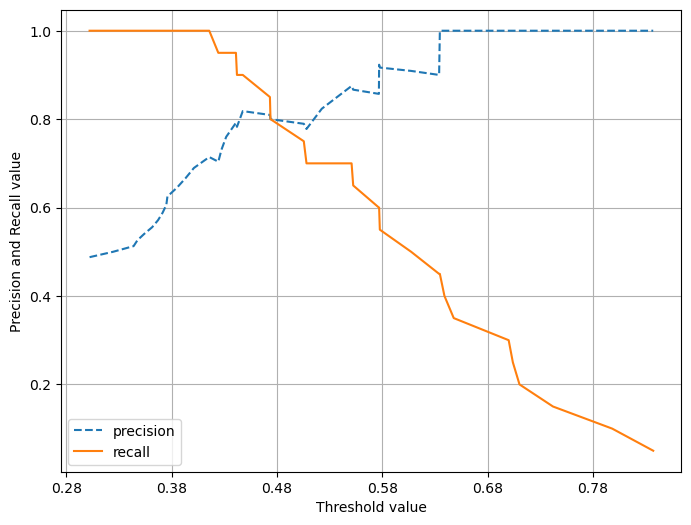

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
import numpy as np

def precision_recall_curve_plot(y_test , prediction_proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, prediction_proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, g_log_reg.predict_proba(X_test)[:, 1] )

In [16]:
_, _, thresholds = precision_recall_curve(y_test, g_log_reg.predict_proba(X_test)[:, 1])
thresholds

array([0.30203772, 0.32439015, 0.34386067, 0.34755163, 0.35397547,
       0.36147501, 0.36703454, 0.37137079, 0.37492313, 0.37596215,
       0.38507997, 0.39326012, 0.4011583 , 0.41569233, 0.42429906,
       0.42727194, 0.43179193, 0.44102647, 0.44200261, 0.44752785,
       0.47331336, 0.47386214, 0.50549278, 0.50805422, 0.52256791,
       0.55086798, 0.55240737, 0.5768064 , 0.57702461, 0.57769661,
       0.60742589, 0.63400745, 0.63470743, 0.6390759 , 0.64789152,
       0.70005922, 0.70403262, 0.71033935, 0.74215511, 0.79837883,
       0.83734826])

In [17]:
from sklearn.preprocessing import Binarizer
def get_evaluation_by_thresholds(y_test, prediction_proba_class1, thresholds):
    
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold).fit(prediction_proba_class1) 
        custom_prediction = binarizer.transform(prediction_proba_class1)
        print('임곗값:', threshold)
        get_evaluation(y_test, custom_prediction)

In [18]:
get_evaluation_by_thresholds(y_test, g_log_reg.predict_proba(X_test)[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.3020377227263497
오차 행렬
[[ 1 20]
 [ 0 20]]
정확도: 0.5122, 정밀도: 0.5000, 재현율: 1.0000, F1:0.6667, AUC:0.5238
###########################################################################
임곗값: 0.3243901486442032
오차 행렬
[[ 2 19]
 [ 0 20]]
정확도: 0.5366, 정밀도: 0.5128, 재현율: 1.0000, F1:0.6780, AUC:0.5476
###########################################################################
임곗값: 0.34386066706808305
오차 행렬
[[ 3 18]
 [ 0 20]]
정확도: 0.5610, 정밀도: 0.5263, 재현율: 1.0000, F1:0.6897, AUC:0.5714
###########################################################################
임곗값: 0.34755162678382934
오차 행렬
[[ 4 17]
 [ 0 20]]
정확도: 0.5854, 정밀도: 0.5405, 재현율: 1.0000, F1:0.7018, AUC:0.5952
###########################################################################
임곗값: 0.3539754741441281
오차 행렬
[[ 5 16]
 [ 0 20]]
정확도: 0.6098, 정밀도: 0.5556, 재현율: 1.0000, F1:0.7143, AUC:0.6190
###########################################################################
임곗값: 0.36147500859200976
오차 행렬
[[ 6 15]
 [ 0 20]]
정확도: 0.6341, 정밀도: 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation_by_custom_proba(y_test, prediction, visualize=False):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if visualize:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_predictions(y_test, prediction, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[17  4]
 [ 3 17]]
정확도: 0.8293, 정밀도: 0.8095, 재현율: 0.8500, F1: 0.8293, ROC-AUC: 0.8298
################################################################################


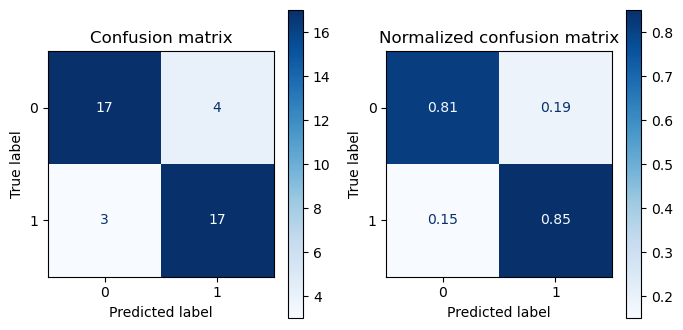

In [20]:
binarizer = Binarizer(threshold=0.4733)
custom_prediction = binarizer.fit_transform(g_log_reg.predict_proba(X_test)[:, 1].reshape(-1, 1))
get_evaluation_by_custom_proba(y_test, custom_prediction, True)

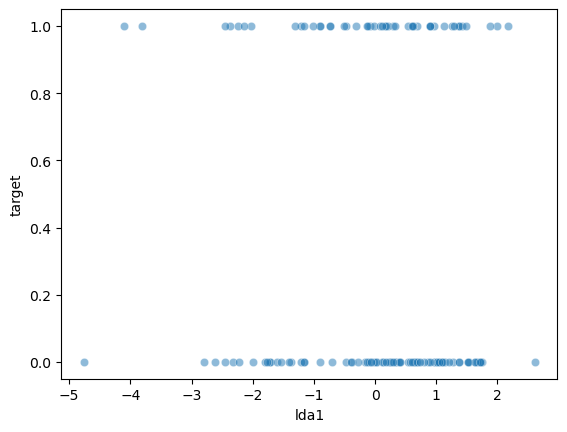

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="lda1", y='target', data=lda_train_df, alpha=0.5)
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 데이터를 훈련 세트와 검증 세트로 나눔
X_train, X_val, y_train, y_val = train_test_split(features, targets, test_size=0.2, random_state=124)

# 모델을 훈련 세트에서 훈련
g_log_reg.fit(X_train, y_train)

# 훈련 세트와 검증 세트에서 모델을 평가하여 성능 지표 계산
train_pred = g_log_reg.predict(X_train)
val_pred = g_log_reg.predict(X_val)

train_accuracy = accuracy_score(y_train, train_pred)
val_accuracy = accuracy_score(y_val, val_pred)

train_precision = precision_score(y_train, train_pred)
val_precision = precision_score(y_val, val_pred)

train_recall = recall_score(y_train, train_pred)
val_recall = recall_score(y_val, val_pred)

train_f1 = f1_score(y_train, train_pred)
val_f1 = f1_score(y_val, val_pred)

print("Training set accuracy:", train_accuracy)
print("Validation set accuracy:", val_accuracy)
print("Training set precision:", train_precision)
print("Validation set precision:", val_precision)
print("Training set recall:", train_recall)
print("Validation set recall:", val_recall)
print("Training set F1 score:", train_f1)
print("Validation set F1 score:", val_f1)

Training set accuracy: 0.8711656441717791
Validation set accuracy: 0.7560975609756098
Training set precision: 0.8888888888888888
Validation set precision: 0.8260869565217391
Training set recall: 0.8311688311688312
Validation set recall: 0.76
Training set F1 score: 0.8590604026845637
Validation set F1 score: 0.7916666666666667


### 📍 3 Cycle
- 언더 샘플링을 통해 타겟 데이터의 비중을 맞춘 뒤, (LDA 이용)차원 축소와 (logistic regression)회귀 훈련을 진행하였다.
- 이전에 오버 샘플링 했을 때 보다 훈련 데이터와 검증 데이터 간의 평가 수치 차이가 작아진 것을 보아 과적합이 해결되었다고 생각된다.
| 점수         | 훈련 데이터 | 검증 데이터 |
|----------------|--------------|----------------|
| Accuracy       | 0.8712       | 0.7561         |
| Precision      | 0.8889       | 0.8261         |
| Recall         | 0.8312       | 0.7600         |
| F1 Score       | 0.8591       | 0.7917         |

- 현재 모델에서는 재현율이 정밀도 보다 높아야 더 좋은 모델이므로 임계치를 낮춰 재현율을 올리고자 하였다.  
  그 결과, 임계치 조정 전보다 조금 더 나은 성능을 보이는 모델을 훈련할 수 있었다.

| 임계치 조정 여부 | 정확도 | 정밀도 | 재현율 | F1 | ROC-AUC |
|-----------------|--------|--------|--------|----|---------|
조정 전            | 0.7805 | 0.7895 | 0.7500 | 0.7692 | 0.7798 |조정 후             | 0.8537 | 0.8182 | 0.9000 | 0.8571 | 0.8548 |
